In [1]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

How does linear regression work?

In [2]:
df = pd.read_csv('data Mashable.csv')
df.head(5)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [3]:
train, test = train_test_split(df, test_size=0.2)

In [4]:
X = df[['data_channel_is_lifestyle', 'global_subjectivity', 'is_weekend','num_imgs', 'data_channel_is_entertainment']]

y = df['shares_log']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =1)

In [6]:
lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.10 + 0.04X


The equation of the model is: 

$y=3.10 + 0.03x$

In [7]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Coefficients: 

In [8]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.040443,data_channel_is_lifestyle
0.306443,global_subjectivity
0.125244,is_weekend
0.004146,num_imgs
-0.096015,data_channel_is_entertainment


In [9]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.03210106626350817

The R^2 is 0.03, which means 3% of the variation in movie scores is explained by the model. That's not good

In [10]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39946139999959934

The RMSE is 0.39. Which means that we are typically about 0.39 off in our predicted rating (which goes from 0-10). 

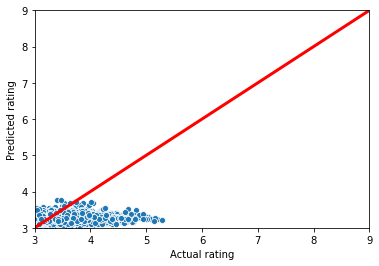

In [11]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are not really balanced. We don't predict so well becuase the most of the predictions are under the line but not around the line. the model is not doing a fine job.